In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",30)

# Project
## Goal : To create a recommendation system engine for Party like songs with high energetic and high like values 

In [230]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Spotify_Youtube.csv")

# Data Info 

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [232]:
df.shape

(20718, 28)

In [233]:
df.drop(columns=["Description","Url_spotify","Uri","Unnamed: 0","Album_type",'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
                 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Url_youtube', 'Title',
                 'Channel','Comments', 'Licensed', 'official_video',"Views","Stream"],inplace=True)

In [234]:
df.columns

Index(['Artist', 'Track', 'Album', 'Danceability', 'Energy', 'Likes'], dtype='object')

In [235]:
df.head()

,Artist,Track,Album,Danceability,Energy,Likes
0,Gorillaz,Feel Good Inc.,Demon Days,0.818,0.705,6220896.0
1,Gorillaz,Rhinestone Eyes,Plastic Beach,0.676,0.703,1079128.0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,282142.0
3,Gorillaz,On Melancholy Hill,Plastic Beach,0.689,0.739,1788577.0
4,Gorillaz,Clint Eastwood,Gorillaz,0.663,0.694,6197318.0


In [236]:
df.shape

(20718, 6)

In [237]:
df.isna().sum()

Artist            0
Track             0
Album             0
Danceability      2
Energy            2
Likes           541
dtype: int64

In [238]:
df.duplicated().sum()

np.int64(0)

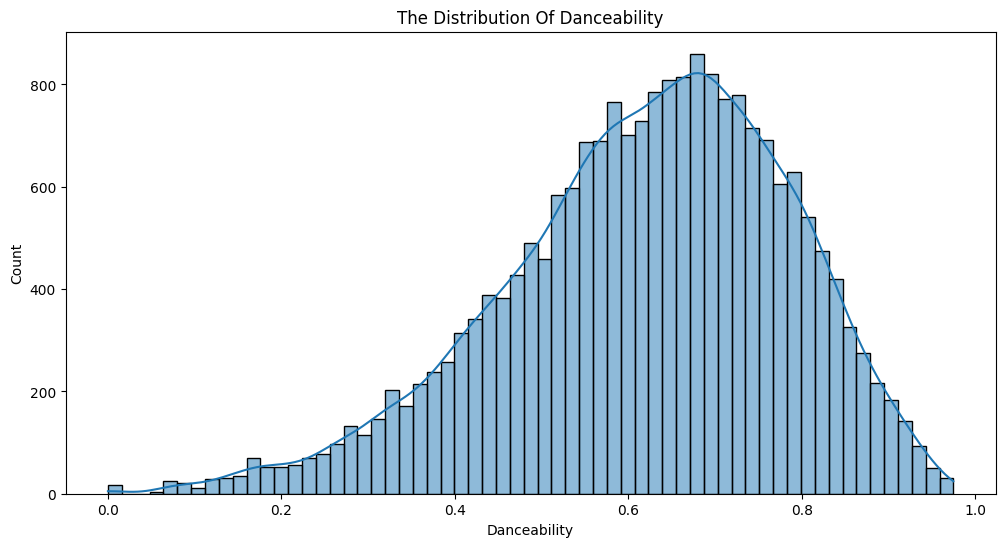

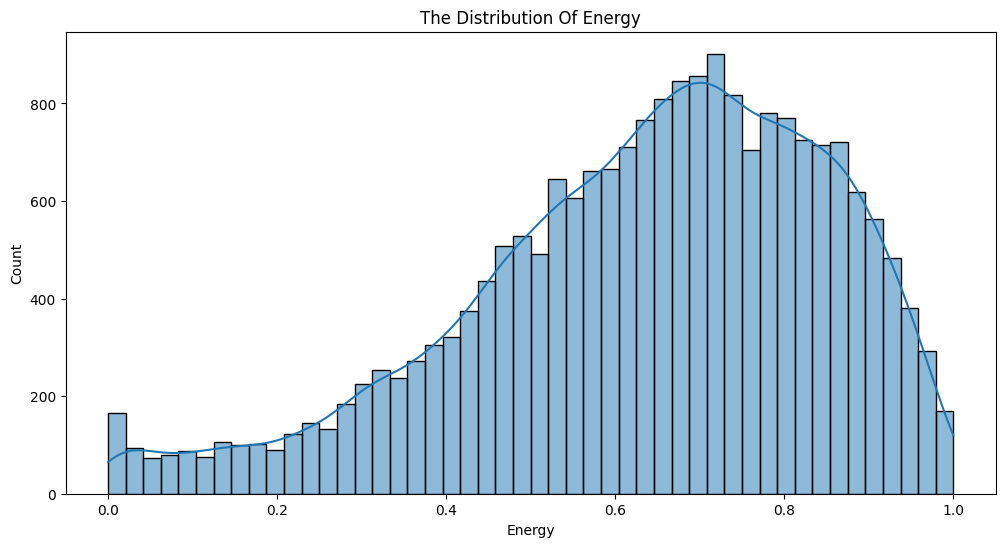

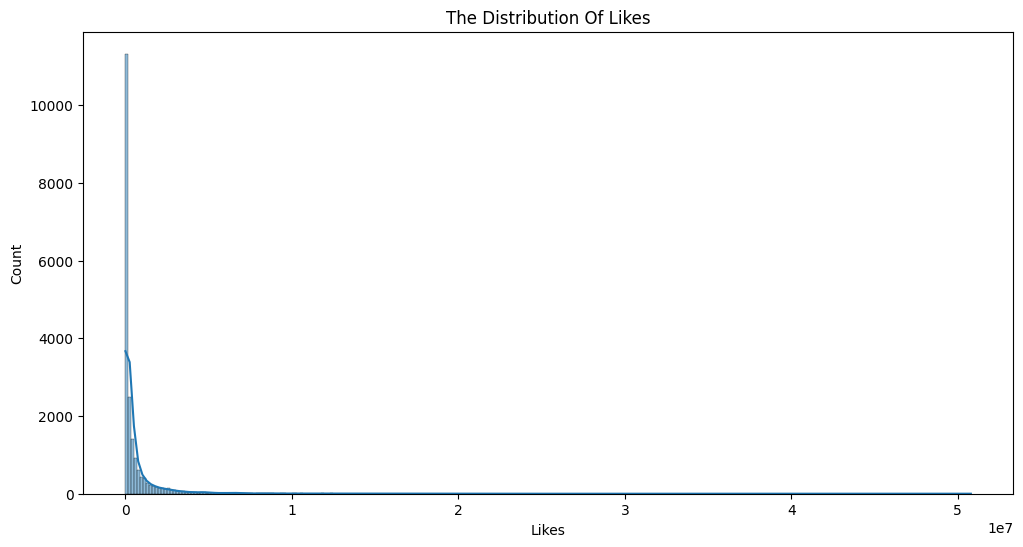

In [239]:
num_col= df.select_dtypes(include="number")
for col in num_col:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,palette="Set1",edgecolor="black")
    plt.title(f"The Distribution Of {col}")
    plt.show()

In [240]:
for cols in num_col:
    print(f"{cols}: {df[cols].skew()}")


Danceability: -0.5501541392863574
Energy: -0.7148519167747349
Likes: 8.670782112179227


In [241]:
import numpy as np

# Fill NaN based on skewness
if abs(df['Danceability'].skew()) > 1:
    df['Danceability'].fillna(df['Danceability'].median(), inplace=True)
else:
    df['Danceability'].fillna(df['Danceability'].mean(), inplace=True)

if abs(df['Energy'].skew()) > 1:
    df['Energy'].fillna(df['Energy'].median(), inplace=True)
else:
    df['Energy'].fillna(df['Energy'].mean(), inplace=True)

if abs(df['Likes'].skew()) > 1:
    df['Likes'].fillna(df['Likes'].median(), inplace=True)
else:
    df['Likes'].fillna(df['Likes'].mean(), inplace=True)


# Visualization

In [242]:
df.head()

,Artist,Track,Album,Danceability,Energy,Likes
0,Gorillaz,Feel Good Inc.,Demon Days,0.818,0.705,6220896.0
1,Gorillaz,Rhinestone Eyes,Plastic Beach,0.676,0.703,1079128.0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,282142.0
3,Gorillaz,On Melancholy Hill,Plastic Beach,0.689,0.739,1788577.0
4,Gorillaz,Clint Eastwood,Gorillaz,0.663,0.694,6197318.0


## Top 25 songs that has highest danceability and enregy ratio 

In [243]:
cato = (
    df.groupby("Track")[["Danceability", "Energy"]]
    .sum()
    .sort_values(by=["Danceability", "Energy"], ascending=False)
    .reset_index()
).head(25)

cato.style.background_gradient(cmap="Reds")

,Track,Danceability,Energy
0,Color Esperanza 2020,11.229000,14.915000
1,Resistiré,7.570000,11.722000
2,El Ultimo Adiós - Varios Artistas Version,6.624000,13.728000
3,Heaven,5.412000,5.298000
4,Valentine's Mashup 2019,5.355000,5.490000
5,Ay Haiti!,4.711000,5.271000
6,"52 Non Stop Dilbar Dilbar Remix(Remix By Kedrock,Sd Style)",4.689000,7.533000
7,"Besharam Rang (From ""Pathaan"")",4.638000,4.770000
8,Suave (Remix),4.375000,4.545000
9,Nada,4.361000,4.230000


## Top 25 songs that has the highest likes

In [244]:
highest_likes=df.groupby("Track")["Likes"].sum().sort_values(ascending=False).reset_index().head(25)
highest_likes.style.background_gradient(cmap="Oranges")

,Track,Likes
0,Despacito,101577278.000000
1,See You Again (feat. Charlie Puth),80295292.000000
2,Boy With Luv (feat. Halsey),55176413.000000
3,lovely (with Khalid),48852042.000000
4,Lean On,48633206.000000
5,Señorita,39692236.000000
6,Old Town Road - Remix,37889373.000000
7,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",37552053.000000
8,Dynamite,36609928.000000
9,Shape of You,31047780.000000


In [245]:
import plotly.express as px
fig=px.bar(cato,x="Track",y=["Danceability","Energy"],barmode="group",title="Top 25 songs that has highest danceability and enregy ratio ")
fig.show()

In [246]:
import plotly.express as px
fig=px.bar(highest_likes,x="Track",y="Likes",title="Top 25 songs that has the highest likes")
fig.show()

# Machine Learning

In [247]:
df.head()

,Artist,Track,Album,Danceability,Energy,Likes
0,Gorillaz,Feel Good Inc.,Demon Days,0.818,0.705,6220896.0
1,Gorillaz,Rhinestone Eyes,Plastic Beach,0.676,0.703,1079128.0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,282142.0
3,Gorillaz,On Melancholy Hill,Plastic Beach,0.689,0.739,1788577.0
4,Gorillaz,Clint Eastwood,Gorillaz,0.663,0.694,6197318.0


In [248]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [249]:
for col in ["Artist", "Track"]:
    freq = df[col].value_counts()
    df[col + "_freq"] = df[col].map(freq)


In [250]:
df["Track"].value_counts()

Track
El Ultimo Adiós - Varios Artistas Version                     24
Color Esperanza 2020                                          19
Resistiré                                                     14
Heaven                                                         9
52 Non Stop Dilbar Dilbar Remix(Remix By Kedrock,Sd Style)     9
                                                              ..
Can't Stop                                                     1
Scar Tissue                                                    1
Otherside                                                      1
Snow (Hey Oh)                                                  1
MISS YOU HARDSTYLE                                             1
Name: count, Length: 17841, dtype: int64

In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Scale features
features = df[["Energy", "Danceability", "Likes"]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

def recommend_songs(track_name, n=5, energy_threshold=0.7, likes_threshold=None):
    if track_name not in df["Track"].values:
        return f"Track '{track_name}' not found in dataset."

    # Target song vector
    track_index = df[df["Track"] == track_name].index[0]
    target_vec = features_scaled[track_index].reshape(1, -1)

    # Compute cosine similarity only with target song
    sim_scores = cosine_similarity(target_vec, features_scaled).flatten()
    
    # Sort by similarity
    sim_indices = sim_scores.argsort()[::-1][1:]  # exclude the song itself
    
    # Build recommendations
    rec_df = df.iloc[sim_indices]
    rec_df = rec_df[
        (rec_df["Energy"] >= energy_threshold) &
        (rec_df["Danceability"] >= 0.6)
    ]
    if likes_threshold:
        rec_df = rec_df[rec_df["Likes"] >= likes_threshold]

    return rec_df.head(n)[["Artist", "Track", "Album", "Energy", "Danceability", "Likes"]]

# Example
recommendations = recommend_songs("Resistiré", n=5, energy_threshold=0.75, likes_threshold=500000)
recommendations


,Artist,Track,Album,Energy,Danceability,Likes
20403,Fujii Kaze,Shinunoga E-Wa,HELP EVER HURT NEVER,0.760,0.600,570473.0
13705,The Script,If You Could See Me Now,#3,0.758,0.602,706478.0
1394,Alesso,REMEDY,REMEDY,0.775,0.601,674495.0
14050,Steve Lacy,Dark Red,Dark Red,0.784,0.603,568346.0
4028,No Doubt,It's My Life,The Singles Collection,0.750,0.606,669504.0
